# Box, box: Pit Stops in Formula 1: A Linear Regression Application

## Importing Data and the neccessary Python libraries

In [2]:
# import libraries and data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sts

pit_stops = pd.read_csv('../data/pit_stops.csv', encoding="utf-8")
results = pd.read_csv('../data/results.csv', encoding="utf-8")
races = pd.read_csv('../data/races.csv', encoding="utf-8")

pit_stops.head() # view the pit stops data

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


In [3]:
races.head() # view the races data

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [4]:
results.head() # view the results data

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


## Cleaning Data

In [5]:
# rename milliseconds to pit_delta and race_time in the respecitve dataframes to avoid confusion
pit_stops.rename(columns = {'milliseconds': 'pit_delta'}, inplace = True)
results.rename(columns = {'milliseconds': 'race_time'}, inplace = True)

# merge the dataframes to have all the information in one dataframe
pit_merge = pd.merge(pit_stops, results, on=['raceId', 'driverId'], how = 'left')
pit_merge2 = pd.merge(pit_merge, races, on = ['raceId'], how = 'left')
pit_merged = pit_merge2[pit_merge2['statusId'] == 1] # filters out only finished races
pit_merged.head()

,raceId,driverId,stop,lap,time_x,duration,pit_delta,resultId,constructorId,number,...,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
2,841,17,1,11,17:20:48,23.426,23426,20783,9,2,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,841,4,1,12,17:22:34,23.251,23251,20782,6,5,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,841,13,1,13,17:24:10,23.842,23842,20785,6,6,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
6,841,20,1,14,17:25:17,22.603,22603,20779,9,1,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
11,841,1,1,16,17:28:24,23.227,23227,20780,1,3,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [6]:
# Print all the column names in merged DataFrame
print(pit_merged.columns)

Index(['raceId', 'driverId', 'stop', 'lap', 'time_x', 'duration', 'pit_delta',
       'resultId', 'constructorId', 'number', 'grid', 'position',
       'positionText', 'positionOrder', 'points', 'laps', 'time_y',
       'race_time', 'fastestLap', 'rank', 'fastestLapTime', 'fastestLapSpeed',
       'statusId', 'year', 'round', 'circuitId', 'name', 'date', 'time', 'url',
       'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time',
       'quali_date', 'quali_time', 'sprint_date', 'sprint_time'],
      dtype='object')


In [7]:
# retain only the columns needed 
selected_columns = ['raceId', 'year', 'driverId', 'stop', 'pit_delta', 'race_time']
my_pit = pit_merged[selected_columns]

my_pit = my_pit.copy() # make copy to modify without issues

my_pit.rename(columns = {'stop': 'number_of_stops' }, inplace = True) 
my_pit.head(10)

,raceId,year,driverId,number_of_stops,pit_delta,race_time
2,841,2011,17,1,23426,5408430
3,841,2011,4,1,23251,5402031
4,841,2011,13,1,23842,5455445
6,841,2011,20,1,22603,5370259
11,841,2011,1,1,23227,5392556
12,841,2011,808,1,24535,5400819
17,841,2011,18,1,16867,5424563
22,841,2011,18,2,23303,5424563
25,841,2011,17,2,22520,5408430
26,841,2011,4,2,24733,5402031


In [8]:
# Group by race and driver and compute total stops
total_stops = my_pit.groupby(['raceId', 'driverId'])['number_of_stops'].transform('max')

# Update the 'number of stops' column
my_pit['number_of_stops'] = total_stops

# Sum all pit delta times to find total time spent on pit stops per race per driver
total_pit_delta = my_pit.groupby(['raceId', 'driverId'])['pit_delta'].transform('sum')

# Update the 'pit_time' column
my_pit['pit_delta'] = total_pit_delta

my_pit.head()

,raceId,year,driverId,number_of_stops,pit_delta,race_time
2,841,2011,17,3,72176,5408430
3,841,2011,4,3,72165,5402031
4,841,2011,13,3,72437,5455445
6,841,2011,20,2,46639,5370259
11,841,2011,1,2,46426,5392556


In [9]:
# Since we have a sum, drop duplicates 
my_pit = my_pit.drop_duplicates(subset=['raceId', 'driverId'])

my_pit.head()

,raceId,year,driverId,number_of_stops,pit_delta,race_time
2,841,2011,17,3,72176,5408430
3,841,2011,4,3,72165,5402031
4,841,2011,13,3,72437,5455445
6,841,2011,20,2,46639,5370259
11,841,2011,1,2,46426,5392556


In [10]:
print(my_pit['race_time'].dtype)
my_pit['race_time'] = my_pit['race_time'].astype(int)
print(my_pit['race_time'].dtype)

object
int64


In [11]:
# remove missing values
my_pit.replace('\\N', np.nan, inplace=True)
my_pit.dropna(inplace=True)

In [12]:
my_pit.describe()

,raceId,year,driverId,number_of_stops,pit_delta,race_time
count,2716.000000,2716.000000,2716.000000,2716.000000,2.716000e+03,2.716000e+03
mean,978.799705,2017.081001,495.038660,2.095361,2.108887e+05,6.006711e+06
std,83.515623,3.879881,398.832086,1.011226,5.921640e+05,1.204546e+06
min,841.000000,2011.000000,1.000000,1.000000,1.743400e+04,4.421143e+06
25%,898.000000,2013.000000,13.000000,1.000000,2.937675e+04,5.376162e+06
50%,980.000000,2017.000000,815.000000,2.000000,4.700550e+04,5.726464e+06
75%,1053.000000,2021.000000,830.000000,3.000000,6.702050e+04,6.169959e+06
max,1115.000000,2023.000000,859.000000,7.000000,3.703013e+06,1.474314e+07


In [13]:
my_pit['race_time'] = my_pit['race_time'] / 60000
my_pit['pit_delta'] = my_pit['pit_delta'] / 60000

In [14]:
def plot_hist(dataframe, column):

    plt.figure(figsize = (10, 8))
    plt.hist(dataframe[column], bins = 50, edgecolor = 'black', alpha = 0.7)

    # Adding mean and quantiles
    mean_val = dataframe[column].mean()
    quantile_25 = dataframe[column].quantile(0.25)
    quantile_50 = dataframe[column].quantile(0.50)
    quantile_75 = dataframe[column].quantile(0.75)

    plt.axvline(mean_val, color='red', linestyle='dashed', 
    linewidth=1, label=f"Mean: {mean_val:.2f}")
    plt.axvline(quantile_25, color='blue', linestyle='dashed', 
    linewidth=1, label=f"25th quantile: {quantile_25:.2f}")
    plt.axvline(quantile_50, color='green', linestyle='dashed', 
    linewidth=1, label=f"50th quantile (median): {quantile_50:.2f}")
    plt.axvline(quantile_75, color='yellow', linestyle='dashed', 
    linewidth=1, label=f"75th quantile: {quantile_75:.2f}")

    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

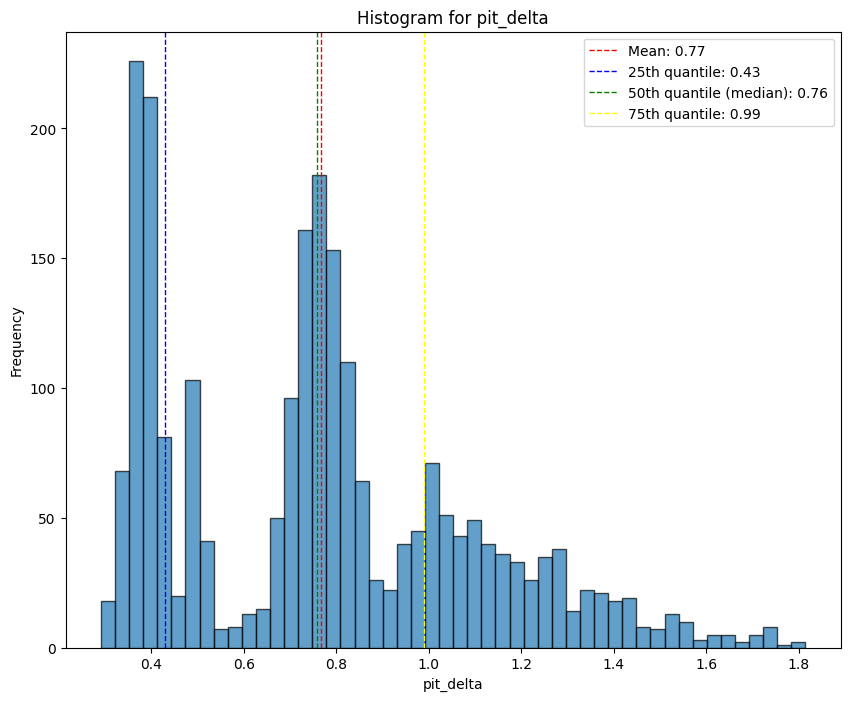

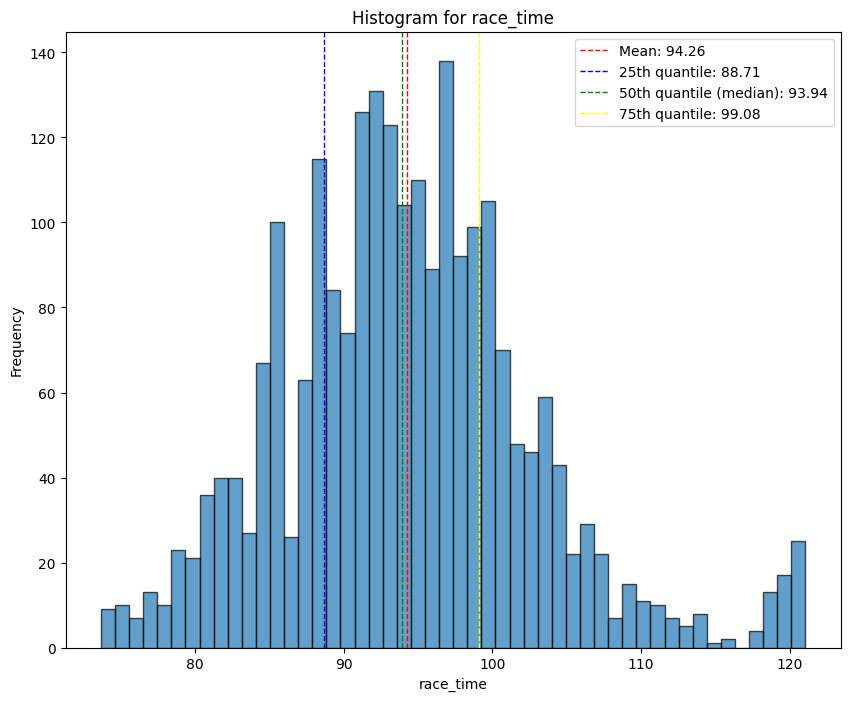

In [15]:
p_quantile_91 = my_pit['pit_delta'].quantile(0.90)
r_quantile_91 = my_pit['race_time'].quantile(0.90)
my_data = my_pit[(my_pit['pit_delta'] < p_quantile_91) & (my_pit['race_time'] < r_quantile_91)]

# histograms for the dataset 
plot_hist(my_data, 'pit_delta')
plot_hist(my_data, 'race_time')

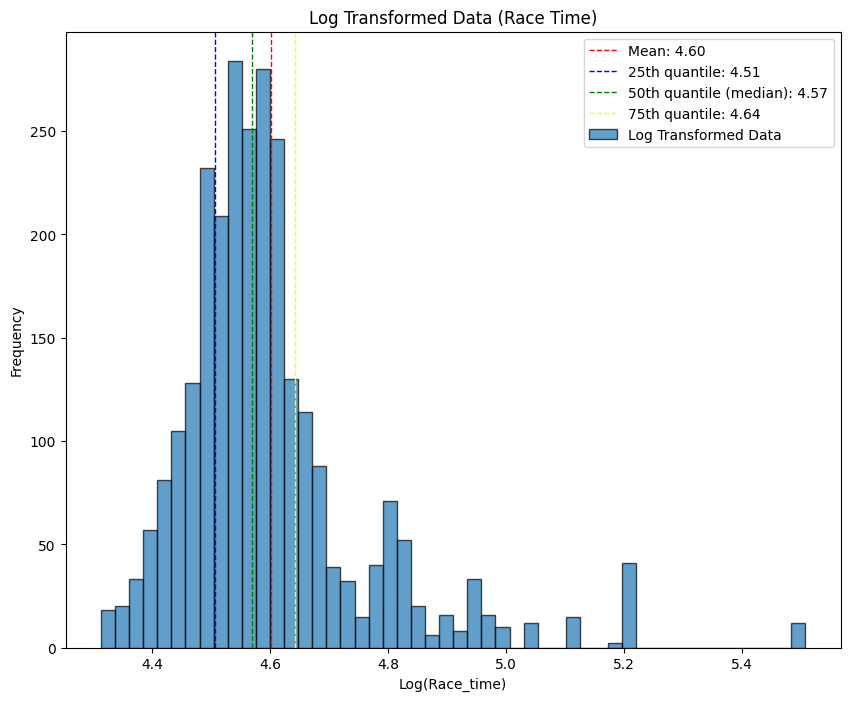

In [28]:
# Transform the pitstop data to view it better
# Apply a logarithmic transformation
log_transformed = np.log1p(my_pit['race_time'])

# Adding mean and quantiles
mean_val = log_transformed.mean()
quantile_25 = log_transformed.quantile(0.25)
quantile_50 = log_transformed.quantile(0.50)
quantile_75 = log_transformed.quantile(0.75)

# Plot the transformed data
plt.figure(figsize=(10, 8))

plt.axvline(mean_val, color='red', linestyle='dashed', 
linewidth=1, label=f"Mean: {mean_val:.2f}")
plt.axvline(quantile_25, color='blue', linestyle='dashed', 
linewidth=1, label=f"25th quantile: {quantile_25:.2f}")
plt.axvline(quantile_50, color='green', linestyle='dashed', 
linewidth=1, label=f"50th quantile (median): {quantile_50:.2f}")
plt.axvline(quantile_75, color='yellow', linestyle='dashed', 
linewidth=1, label=f"75th quantile: {quantile_75:.2f}")

plt.hist(log_transformed, bins = 50, label='Log Transformed Data', edgecolor = 'black', alpha = 0.7)
plt.legend()
plt.title('Log Transformed Data (Race Time)')
plt.xlabel('Log(Race_time)')
plt.ylabel('Frequency')
plt.show()

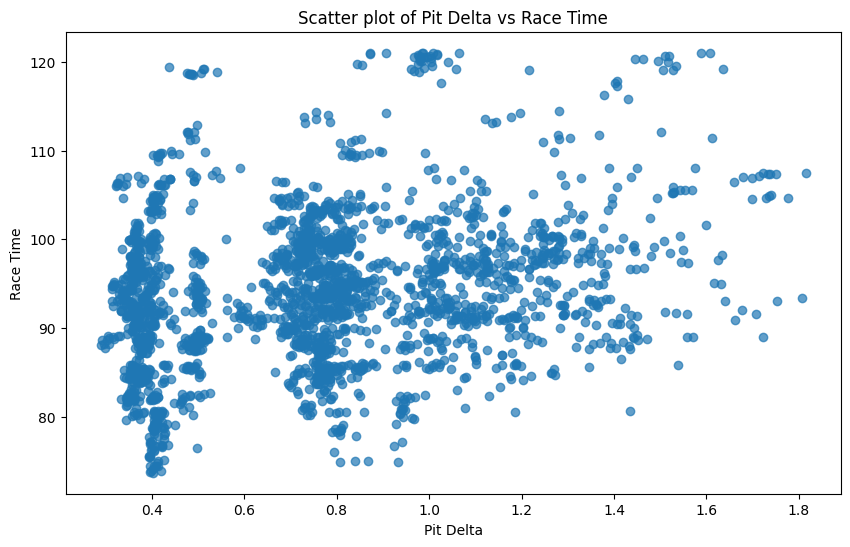

In [16]:
# Scatter plot 
plt.figure(figsize=(10, 6))
plt.scatter(x='pit_delta', y='race_time', data=my_data, alpha = 0.7)
plt.title('Scatter plot of Pit Delta vs Race Time')
plt.xlabel('Pit Delta')
plt.ylabel('Race Time')
plt.show()

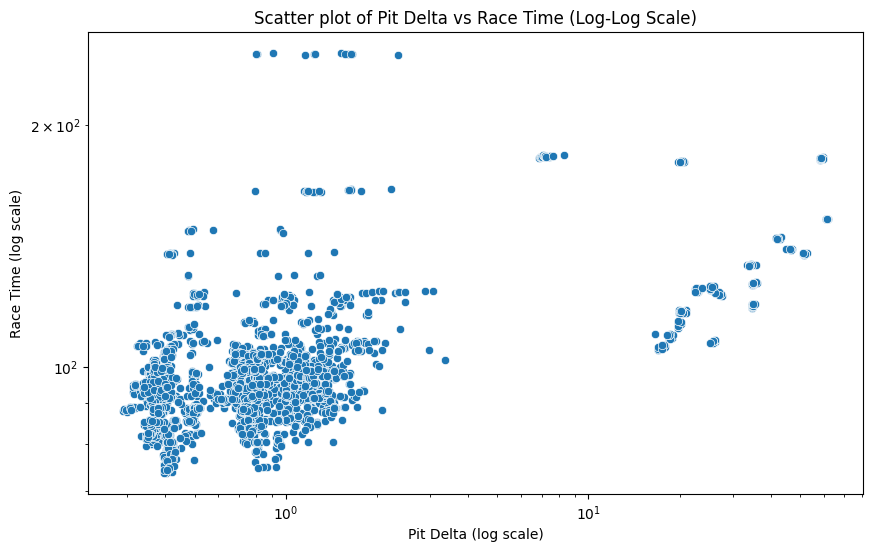

In [27]:
epsilon = 1e-5 # to ensure that none of the transformations are zero. Although highly unlikely

# Scatter plot on a log scale
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pit_delta', y='race_time', data=my_pit + epsilon)
plt.xscale('log')
plt.yscale('log')
plt.title('Scatter plot of Pit Delta vs Race Time (Log-Log Scale)')
plt.xlabel('Pit Delta (log scale)')
plt.ylabel('Race Time (log scale)')
plt.show()

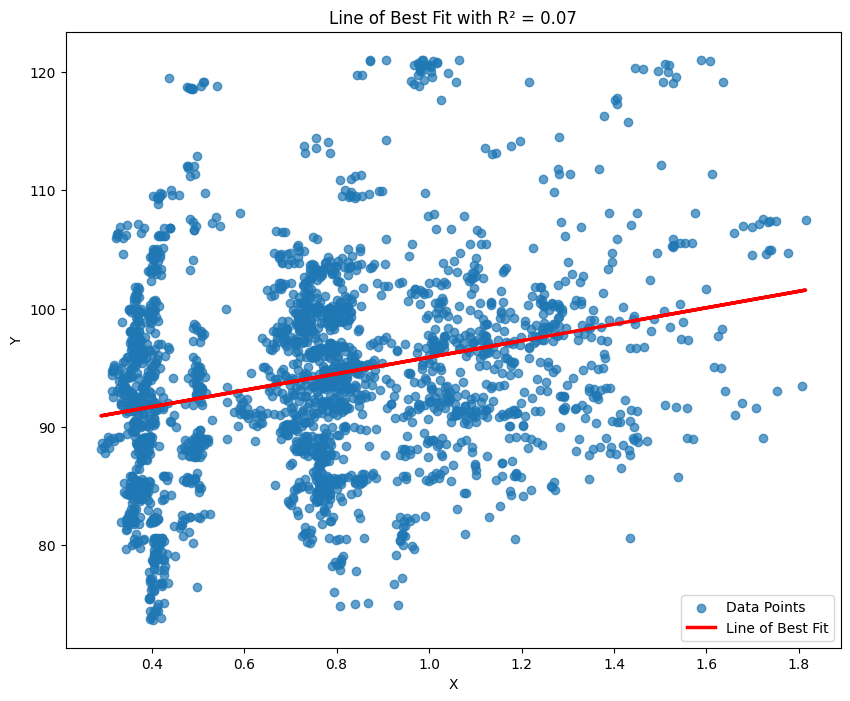

88.90158441653307


In [17]:
pit_delta = my_data['pit_delta']
race_time = my_data['race_time']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = sts.linregress(pit_delta, race_time)

# Generate y-values for the line of best fit
y_fit = slope * pit_delta + intercept

# Plotting
plt.figure(figsize=(10,8))
plt.scatter(pit_delta, race_time, label='Data Points', alpha = 0.7)
plt.plot(pit_delta, y_fit, color='red', label='Line of Best Fit', linewidth=2.5)  # Adjusted line thickness

# Adding labels, legend, and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'Line of Best Fit with R² = {r_value**2:.2f}')
plt.legend()

plt.show()

print(intercept)

In [18]:
# Assuming my_data is your DataFrame
my_data2 = my_data.sort_values(by='number_of_stops', ascending=True)

# Display the sorted DataFrame (optional
my_data2.head()  # Shows the first few rows of the sorted DataFrame


,raceId,year,driverId,number_of_stops,pit_delta,race_time
5898,978,2017,822,1,0.464300,81.691550
5985,981,2017,822,1,0.395467,75.613050
5984,981,2017,815,1,0.422950,76.793133
5983,981,2017,1,1,0.395417,75.538533
5982,981,2017,20,1,0.405117,76.143817


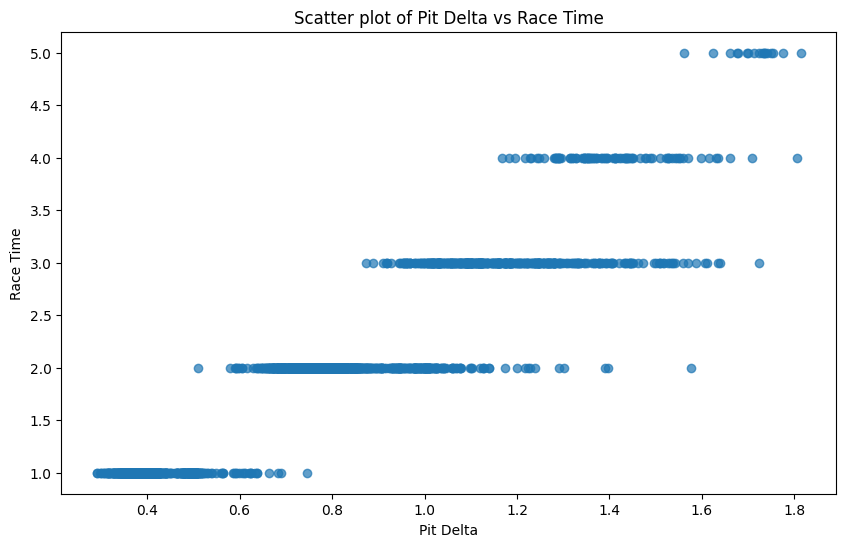

In [19]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x='pit_delta', y='number_of_stops', data=my_data2, alpha = 0.7)
plt.title('Scatter plot of Pit Delta vs Race Time')
plt.xlabel('Pit Delta')
plt.ylabel('Race Time')
plt.show()

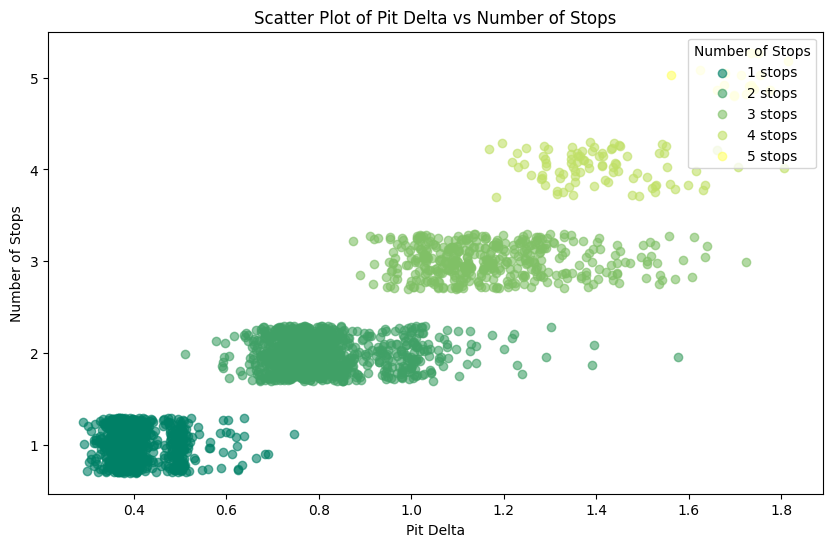

In [20]:
# Adding jitter: modify the 'number_of_stops' by adding a small random noise
jitter_amount = 0.3
# Convert 'number_of_stops' to numeric type before adding jitter
jittered_number_of_stops = my_data2['number_of_stops'].astype(float) + np.random.uniform(-jitter_amount, jitter_amount, size=len(my_data2))

# Generate a colormap based on the number of unique 'number_of_stops'
unique_stops = my_data2['number_of_stops'].unique()
colors = plt.cm.summer(np.linspace(0, 1, len(unique_stops)))

plt.figure(figsize=(10, 6))

# Create a scatter plot for each group with different colors
for i, stop in enumerate(sorted(unique_stops)):  # Ensure sorted order for consistent color mapping
    mask = my_data2['number_of_stops'] == stop
    plt.scatter(x=my_data2['pit_delta'][mask], y=jittered_number_of_stops[mask], alpha=0.6, color=colors[i], label=f'{stop} stops')

plt.title('Scatter Plot of Pit Delta vs Number of Stops')
plt.xlabel('Pit Delta')
plt.ylabel('Number of Stops')

plt.legend(title="Number of Stops", loc='upper right')  # Adjusting legend position

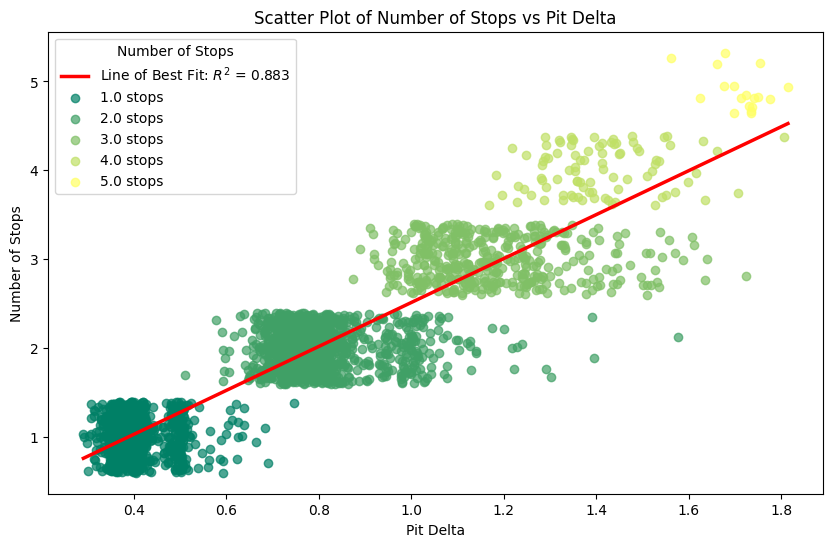

In [24]:
# Calculating the line of best fit
# Convert 'number_of_stops' into a numeric format that fits with linregress
y_numeric = np.array(my_data2['number_of_stops'].apply(lambda x: float(x)))  # Now used as 'y'
x = my_data2['pit_delta'].values  # Now used as 'x'

slope, intercept, r_value, p_value, std_err = sts.linregress(x, y_numeric)  # Notice x and y_numeric switch places

# Generating values for the line of best fit
x_vals = np.linspace(np.min(x), np.max(x), 100)  # Generating x values for plotting the line
y_vals = intercept + slope * x_vals  # Corresponding y values for the line

plt.figure(figsize=(10, 6))

# Plotting the line of best fit
plt.plot(x_vals, y_vals, color="red", linewidth=2.5,
         label=f'Line of Best Fit: $R^2$ = {r_value**2:.3f}')

# Create a scatter plot for each group with different colors
# Adding jitter to 'number_of_stops' for visualization purposes
jitter_amount = 0.4
jittered_number_of_stops = y_numeric + np.random.uniform(-jitter_amount, jitter_amount, size=len(y_numeric))

for i, stop in enumerate(sorted(np.unique(y_numeric))):  # Ensuring sorted order for consistent plotting
    mask = y_numeric == stop
    plt.scatter(x=x[mask], y=jittered_number_of_stops[mask], alpha=0.7, color=colors[i], label=f'{stop} stops')
    
plt.title('Scatter Plot of Number of Stops vs Pit Delta')
plt.xlabel('Pit Delta')
plt.ylabel('Number of Stops')

plt.legend(title="Number of Stops", loc='upper left')

plt.show()

In [25]:
# Save the DataFrame to a CSV file for use in other notebooks
my_data2.to_csv('../data/pitstops_modified.csv', index=False)  # Use index=False if you don't want to save the index